In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from fit import likelihood, stat_fit
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)

# WM

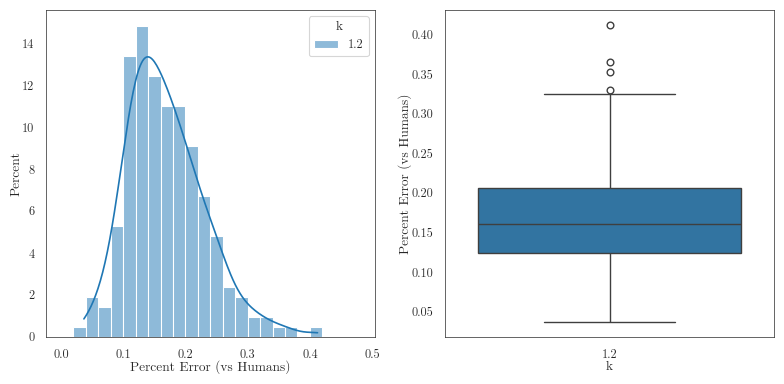

In [18]:
z05k12 = pd.read_pickle(f"data/WM_z05k12.pkl").query("type=='model-WM'")
combined = pd.concat([z05k12], ignore_index=True)

dfs = []
columns = ['type', 'sid', 'z', 'k', 'percent error']
for k in combined['k'].unique():
    for sid in combined['sid'].unique():
        subdata = combined.query("k==@k & sid==@sid")
        z = subdata['z'].unique()[0]
        errors = subdata['error'].to_numpy()
        if len(errors)==0:
            print(f"missing k={k} sid={sid}")
            continue
        percent_error = np.sum(errors) / len(errors)
        df = pd.DataFrame([['model-WM', sid, str(z), str(k), percent_error]], columns=columns)
        dfs.append(df)
reduced = pd.concat(dfs, ignore_index=True)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
bins = np.arange(0.0, 0.5, 0.02)
ks = reduced['k'].unique()

sns.histplot(reduced, x='percent error', hue='k', ax=axes[0], palette=palette[:len(ks)], stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(reduced, x='k', y='percent error', hue='k', ax=axes[1], palette=palette[:len(ks)])
axes[0].set(xlabel="Percent Error (vs Humans)") 
axes[1].set(xlabel="k", ylabel='Percent Error (vs Humans)') 
plt.tight_layout()
fig.savefig("plots/wm_errors_zk.png", dpi=600)

# RL

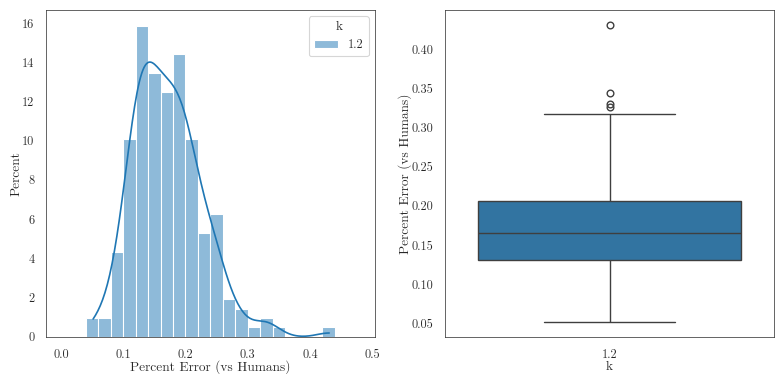

In [14]:
z05k12 = pd.read_pickle(f"data/RL_z05k12.pkl").query("type=='model-RL'")
combined = pd.concat([z05k12], ignore_index=True)

dfs = []
columns = ['type', 'sid', 'z', 'k', 'percent error']
for k in combined['k'].unique():
    for sid in combined['sid'].unique():
        subdata = combined.query("k==@k & sid==@sid")
        z = subdata['z'].unique()[0]
        errors = subdata['error'].to_numpy()
        if len(errors)==0:
            print(f"missing k={k} sid={sid}")
            continue
        percent_error = np.sum(errors) / len(errors)
        df = pd.DataFrame([['model-RL', sid, str(z), str(k), percent_error]], columns=columns)
        dfs.append(df)
reduced = pd.concat(dfs, ignore_index=True)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
bins = np.arange(0.0, 0.5, 0.02)
ks = reduced['k'].unique()

sns.histplot(reduced, x='percent error', hue='k', ax=axes[0], palette=palette[:len(ks)], stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(reduced, x='k', y='percent error', hue='k', ax=axes[1], palette=palette[:len(ks)])
axes[0].set(xlabel="Percent Error (vs Humans)") 
axes[1].set(xlabel="k", ylabel='Percent Error (vs Humans)') 
plt.tight_layout()
fig.savefig("plots/rl_errors_zk.png", dpi=600)

# Statistical models

## Fit a model

In [2]:
stat_fit("RL1rd", 1, save=False)

trial 1, stage 1, obs -1, RD 1
trial 1, stage 1, obs -1, RD 1
trial 1, stage 1, obs 1, RD 1
trial 1, stage 2, obs -1, RD 0.23077
trial 1, stage 2, obs 1, RD 0.30769
trial 1, stage 2, obs -1, RD 0.23077
trial 1, stage 3, obs -1, RD 0.30769
trial 1, stage 3, obs -1, RD 0.23077
trial 1, stage 3, obs -1, RD 0.23077
trial 2, stage 1, obs -1, RD 1
trial 2, stage 1, obs 1, RD 1
trial 2, stage 2, obs 1, RD 0.22222
trial 2, stage 2, obs -1, RD 0.55556
trial 2, stage 3, obs -1, RD 0.55556
trial 2, stage 3, obs 1, RD 0.22222
trial 3, stage 1, obs -1, RD 1
trial 3, stage 1, obs 1, RD 1
trial 3, stage 1, obs 1, RD 1
trial 3, stage 2, obs -1, RD 0.3125
trial 3, stage 2, obs 1, RD 0.1875
trial 3, stage 2, obs -1, RD 0.3125
trial 3, stage 3, obs -1, RD 0.3125
trial 3, stage 3, obs -1, RD 0.3125
trial 3, stage 3, obs -1, RD 0.1875
trial 4, stage 1, obs 1, RD 1
trial 4, stage 1, obs -1, RD 1
trial 4, stage 2, obs -1, RD 0.5
trial 4, stage 2, obs 1, RD 0.3
trial 4, stage 3, obs 1, RD 0.3
trial 4, stage 3

,type,sid,neg-log-likelihood,alpha,beta,inv-temp
0,RL1rd,1,56.189053,0.34846,None,5.345489


In [4]:
pd.read_pickle(f"data/behavior.pkl").query("trial==1 & sid==1")

,sid,trial,network,stage,who,color,degree,RD,action
0,1,1,9,0,2,1,3,0.00000,1
1,1,1,9,1,6,0,3,0.23077,1
2,1,1,9,1,5,0,3,0.23077,1
3,1,1,9,1,7,1,4,0.30769,1
4,1,1,9,2,5,0,3,0.23077,0
5,1,1,9,2,7,1,4,0.30769,0
6,1,1,9,2,6,0,3,0.23077,0
7,1,1,9,3,7,0,4,0.30769,0
8,1,1,9,3,6,0,3,0.23077,0
9,1,1,9,3,5,0,3,0.23077,0


In [ ]:
start = time.time()
model_type = "RL1"
sids = pd.read_pickle(f"data/behavior.pkl")['sid'].unique()
dfs = []
for sid in sids:
    print(sid)
    df = stat_fit(model_type, sid, save=False)
    dfs.append(df)
fitted = pd.concat(dfs, ignore_index=True)
fitted.to_pickle(f"data/fitted_{model_type}.pkl")
end = time.time()
print(f"runtime {(end-start)/60:.4} min")

/tmp/ipykernel_112711/33815239.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined = pd.concat([fitted_RL1, fitted_RL1rd, fitted_RL2, fitted_RL2rd, fitted_NEF_WM], ignore_index=True)
/tmp/ipykernel_112711/33815239.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))


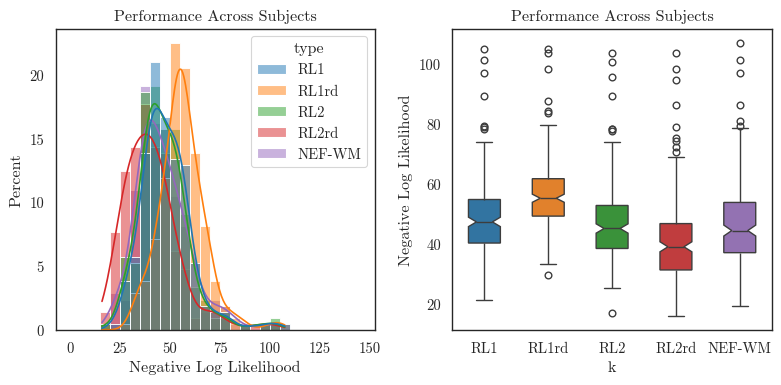

In [4]:
fitted_NEF_WM = pd.read_pickle(f"data/fitted_NEF-WM.pkl")
fitted_RL1 = pd.read_pickle(f"data/RL1_obsneg.pkl")
fitted_RL1rd = pd.read_pickle(f"data/RL1rd_obsneg.pkl")
fitted_RL2 = pd.read_pickle(f"data/RL2_obsneg.pkl")
fitted_RL2rd = pd.read_pickle(f"data/RL2rd_obsneg.pkl")
combined = pd.concat([fitted_RL1, fitted_RL1rd, fitted_RL2, fitted_RL2rd, fitted_NEF_WM], ignore_index=True)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
bins = np.arange(0, 150, 5)
types = combined['type'].unique()

sns.histplot(combined, x='neg-log-likelihood', hue='type', ax=axes[0], palette=palette[:len(types)],
             stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(combined, x='type', y='neg-log-likelihood', hue='type', ax=axes[1], palette=palette[:len(types)],
           notch=True, width=0.5)
axes[0].set(xlabel="Negative Log Likelihood", title="Performance Across Subjects") 
axes[1].set(xlabel="k", ylabel='Negative Log Likelihood', title="Performance Across Subjects") 
plt.tight_layout()
fig.savefig("plots/fitted.png", dpi=600)

In [36]:
fitted_RL1rd

,type,sid,neg-log-likelihood,alpha,beta,inv-temp
0,RL1rd,1,101.754091,2.233751,None,1.070406
1,RL1rd,2,98.236532,10.000000,None,1.259201
2,RL1rd,3,103.017785,0.709678,None,1.066573
3,RL1rd,4,105.713503,0.059884,None,0.875904
4,RL1rd,5,102.475606,3.250024,None,1.017035
...,...,...,...,...,...,...
204,RL1rd,220,103.309958,1.914051,None,1.003437
205,RL1rd,221,104.964284,0.000000,None,0.866942
206,RL1rd,222,94.530963,10.000000,None,1.488075
207,RL1rd,223,87.666952,10.000000,None,1.777772


In [37]:
fitted_RL2rd

,type,sid,neg-log-likelihood,alpha,beta,inv-temp
0,RL2rd,1,96.464415,0.000000,10.000000,1.421386
1,RL2rd,2,98.236532,10.000000,10.000000,1.259201
2,RL2rd,3,94.241575,0.175565,10.000000,1.629804
3,RL2rd,4,99.864653,0.063081,2.273498,1.357493
4,RL2rd,5,102.475523,10.000000,3.250024,1.019209
...,...,...,...,...,...,...
204,RL2rd,220,92.517909,0.000000,2.000000,1.758793
205,RL2rd,221,92.787736,0.000000,2.176742,1.766281
206,RL2rd,222,88.683017,0.000000,10.000000,1.929911
207,RL2rd,223,87.666952,10.000000,10.000000,1.777774


In [29]:
pd.read_pickle(f"data/behavior.pkl")['RD'].unique()

array([0.      , 0.23077 , 0.30769 , 0.55556 , 0.22222 , 0.1875  ,
       0.3125  , 0.3     , 0.5     , 0.27273 , 0.18182 , 0.2     ,
       0.26667 , 0.33333 , 0.41667 , 0.15385 , 0.27778 , 0.38462 ,
       0.21429 , 0.35714 , 0.25    , 0.16667 , 0.28571 , 0.42857 ,
       0.15789 , 0.10526 , 0.13043 , 0.17391 , 0.21739 , 0.375   ,
       0.14286 , 0.83333 , 0.44444 , 0.095238, 0.2381  , 0.4     ,
       0.125   , 0.11111 , 0.13333 , 0.1     , 0.15    , 0.15625 ,
       0.09375 , 0.13636 , 0.22727 , 0.19048 , 0.36364 , 0.45455 ,
       0.26316 , 0.21053 , 0.052632, 0.17647 , 0.11765 , 0.26087 ,
       0.071429, 0.066667, 0.24    , 0.058824, 0.17241 , 0.13793 ,
       0.2069  , 0.29412 , 0.23529 , 0.0625  , 0.17857 , 0.10714 ])

/tmp/ipykernel_87594/4278865275.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.hist(a)


(array([48., 22., 11., 11., 11.,  8.,  6., 10., 17., 65.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

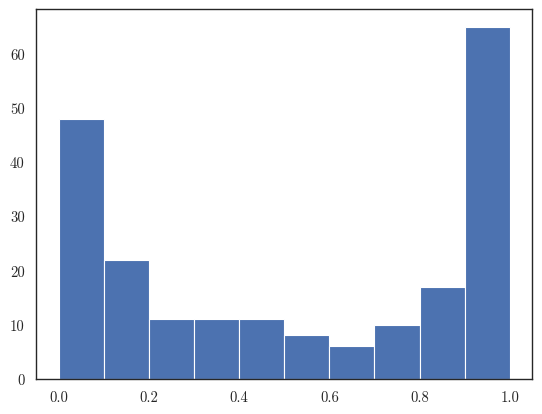

In [30]:
a = fitted_RL1rd['alpha'].to_numpy()
plt.hist(a)